In [11]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


C:\Users\pouya\AppData\Local\Temp\ipykernel_18936\616232268.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


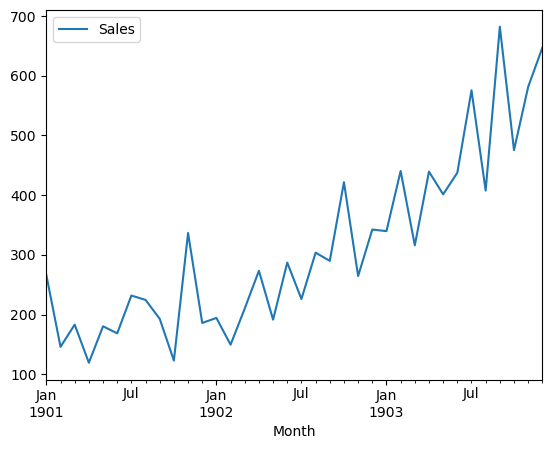

In [12]:
# تعریف تابع تبدیل تاریخ
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# بارگذاری داده‌ها و تبدیل تاریخ به فرمت مشخص
series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# تبدیل ایندکس به تاریخ با فرمت مشخص (در صورت نیاز)
series.index = pd.to_datetime(series.index, format='%Y-%m')

# نمایش چند سطر اول داده‌ها
print(series.head())

# رسم نمودار داده‌ها
series.plot()
pyplot.show()

In [13]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

In [14]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

In [15]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 136.761


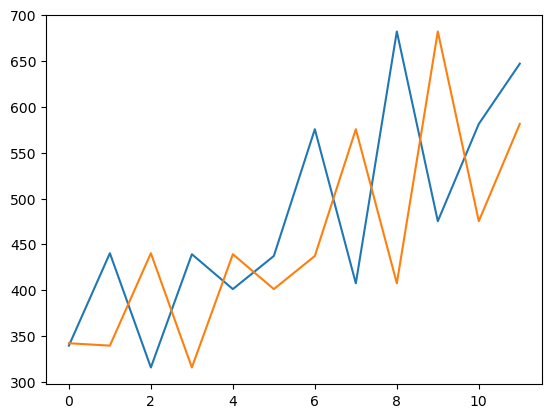

In [16]:
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()